# Summaries of LV3 OpenRocket Simulation

### Interpreter Version
This notebook was last run with the interpreter shown below.  
It is known to work with output from OpenRocket `15.03`.  
(It will probably work with any version of R.)

In [1]:
data.frame(R.Version())

platform,arch,os,system,status,major,minor,year,month,day,svn.rev,language,version.string,nickname
x86_64-pc-linux-gnu,x86_64,linux-gnu,"x86_64, linux-gnu",,3,2.3,2015,12,10,69752,R,R version 3.2.3 (2015-12-10),Wooden Christmas-Tree


### Data Input
When creating a CSV file from OpenRocket, take the "kitchen sink" approach. If it gives you an option to include something, include it. Missing data may cause this script to break or give misleading/unexpected output.

The comment character should be an octothorpe (`#`). The CSV should include commented lines for when certain events occur, such as the apogee.

In [2]:
# CSV file you want to look at
#csvName <- 'simData/LV3_L13_O3400_2018-02-06.csv'
csvName <- 'simData/LV3_L13_N2501_2018-02-06.csv'
cat('This cell DOES auto-complete parens and quotes. (awful!)')

In [ ]:
cat('This cell doesn\'t auto-complete my parens or quotes. (nice!)')
cat('And, now that I\'ve restarted the server and the kernel, it DOES!)

In [ ]:
cat('This cell was created after the kernel was started, and it doesn\'t.')
cat('After re-opening the cell, it still behaves correctly.')

In [3]:
#### parse the CSV file ####
simStringLines <- readLines(csvName)#read the CSV as a vector of the lines
dat <- read.csv(#load the simulation from a CSV into a data frame
	csvName, 
	comment.char= "#",#ignore commented lines
	nrows= grep("APOGEE", simStringLines)#stop reading [slightly] after apogee
	)
if (!exists("dat")) stop("Couldn't find ", csvName) # check that we sucessfully read the CSV
datNames <- simStringLines[grep("Time", simStringLines)] # extract the column names
datNames <- sub(pattern= "# ", replacement= "", x= datNames) # remove comment char
datNames <- strsplit(datNames, split= ",")[[1]] # break apart into a vector
datNames <- gsub("[^[:alnum:]///' ]", "", datNames)#regex black magic (remove weird chars)
datNames <- sub(pattern= " ", replacement= "_", datNames)#replace spaces with underscores
datNames <- sub(pattern= " ", replacement= "_", datNames)#nonbreaking spaces?
datNames <- sub(pattern= " ", replacement= "_", datNames)#other magical spaces?!
colnames(dat) <- datNames # name the columns
head(dat)

Time_s,Altitude_m,Vertical_velocity_m/s,Vertical_acceleration_m/s,Total_velocity_m/s,Total_acceleration_m/s,Position_East_of_launch m,Position_North_of_launch m,Lateral_distance_m,Lateral_direction_,⋯,Reference_length_cm,Reference_area_cm,Vertical_orientation_zenith_,Lateral_orientation_azimuth_,Wind_velocity_m/s,Air_temperature_C,Air_pressure_mbar,Speed_of_sound_m/s,Simulation_time_step_s,Computation_time_s
0.002,0.0000e+00,0.00000000,-5.46770,0.00000000,5.46770,0,0,0,0,⋯,16.764,220.72,90,0,NaN,6.03,858.32,334.95,0.002,0.0062884
0.004,0.0000e+00,0.00000000,-2.57890,0.00000000,2.57890,0,0,0,0,⋯,16.764,220.72,90,0,NaN,6.03,858.32,334.95,0.002,0.0072761
0.006,0.0000e+00,0.00000000,0.31011,0.00000000,0.31011,0,0,0,0,⋯,16.764,220.72,90,0,NaN,6.03,858.32,334.95,0.002,0.0084689
0.008,6.2066e-07,0.00062077,3.19930,0.00062077,3.19930,0,0,0,0,⋯,16.764,220.72,90,0,NaN,6.03,858.32,334.95,0.002,0.0095215
0.010,8.2613e-06,0.00702000,6.08860,0.00702000,6.08860,0,0,0,0,⋯,16.764,220.72,90,0,NaN,6.03,858.32,334.95,0.002,0.0109910
0.012,3.4479e-05,0.01919800,8.97820,0.01919800,8.97820,0,0,0,0,⋯,16.764,220.72,90,0,NaN,6.03,858.32,334.95,0.002,0.0120030


## Summary

In [4]:
flightMaximums <- sapply(1:ncol(dat), function(i) max(dat[,i], na.rm = T))
names(flightMaximums) <- names(dat)

Warning message in max(dat[, i], na.rm = T):
“no non-missing arguments to max; returning -Inf”

In [5]:
cat('Maximum values:\n')
flightMaximums

Maximum values:


Time_s                         Altitude_m 
                        3.1820e+01                         5.4907e+03 
             Vertical_velocity_m/s          Vertical_acceleration_m/s 
                        4.2523e+02                         1.0533e+02 
                Total_velocity_m/s             Total_acceleration_m/s 
                        4.2628e+02                         1.0533e+02 
         Position_East_of_launch m         Position_North_of_launch m 
                        5.0962e+02                         6.9201e-01 
                Lateral_distance_m                 Lateral_direction_ 
                        5.0962e+02                         7.7803e-02 
              Lateral_velocity_m/s           Lateral_acceleration_m/s 
                        3.0005e+01                         1.3129e+01 
                         Latitude_                         Longitude_ 
                        4.3400e+01                        -1.2039e+02 
    Gravitational_acceleration_m/s                   Angle_of_attack_ 
                        9.8005e+00                         9.0000e+01 
                      Roll_rate_/s                      Pitch_rate_/s 
                        0.0000e+00                         1.9573e+01 
                       Yaw_rate_/s                             Mass_g 
                        5.1697e-01                         3.0457e+04 
                 Propellant_mass_g Longitudinal_moment_of_inertia kgm 
                        8.7035e+03                         3.0452e+01 
  Rotational_moment_of_inertia kgm                     CP_location_cm 
                        7.0951e-02                         2.5495e+02 
                    CG_location_cm         Stability_margin_calibers_ 
                        2.1374e+02                         4.1370e+00 
                      Mach_number_                   Reynolds_number_ 
                        1.2948e+00                         7.7150e+07 
                          Thrust_N                       Drag_force_N 
                        3.4855e+03                         8.5973e+02 
                 Drag_coefficient_            Axial_drag_coefficient_ 
                        5.1304e-01                         5.8408e-01 
        Friction_drag_coefficient_         Pressure_drag_coefficient_ 
                        3.8881e-01                         6.9704e-02 
            Base_drag_coefficient_          Normal_force_coefficient_ 
                        2.4990e-01                         9.4933e+00 
         Pitch_moment_coefficient_            Yaw_moment_coefficient_ 
                        8.3500e+00                         4.9972e-04 
           Side_force_coefficient_           Roll_moment_coefficient_ 
                        0.0000e+00                         0.0000e+00 
         Roll_forcing_coefficient_          Roll_damping_coefficient_ 
                        0.0000e+00                         0.0000e+00 
        Pitch_damping_coefficient_          Coriolis_acceleration_m/s 
                        2.6280e+00                         4.5269e-02 
               Reference_length_cm                  Reference_area_cm 
                        1.6764e+01                         2.2072e+02 
      Vertical_orientation_zenith_       Lateral_orientation_azimuth_ 
                        9.0000e+01                         1.3639e-01 
                 Wind_velocity_m/s                  Air_temperature_C 
                              -Inf                         6.0300e+00 
                 Air_pressure_mbar                 Speed_of_sound_m/s 
                        8.5832e+02                         3.3495e+02 
            Simulation_time_step_s                 Computation_time_s 
                        1.0000e-02                         2.2362e+00

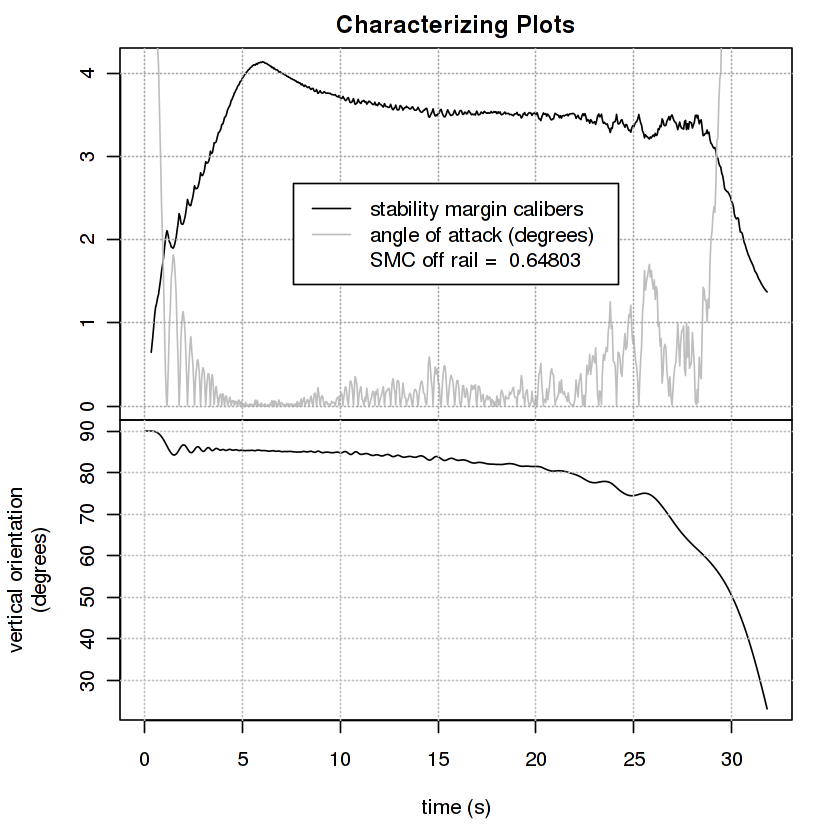

In [6]:
par.old <- par()
layout(matrix(c(1,2), nrow=2), heights = c(1,1))
par(mar=c(0,5,2,2))
plot(
    dat$Time_s, dat$Stability_margin_calibers_, 
    type='l', ylim=c(0, max(dat$Stab, na.rm=T)),
    xlab='time (s)', ylab=NA, xaxt='n',
    main='Characterizing Plots'
    )
lines(dat$Time_s, dat$Angle_of_attack_, col='gray')
grid(col='darkgray')
legend(
    'center', 
    legend=c(
        'stability margin calibers',
        'angle of attack (degrees)',
        paste('SMC off rail = ', na.omit(dat$Stability)[1])
    ),
    col=c('black', 'gray', NA),
    lty=1
)
par(mar=c(5,5,0,2))
plot(
    dat$Time, dat$Vertical_orientation_zenith_,
    xlab='time (s)', ylab= 'vertical orientation\n(degrees)',
    type='l'
)
grid(col='gray')
suppressWarnings(par(par.old))